In [105]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
from scipy.stats import bernoulli
sns.set_theme()
from scipy.stats import norm
geno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pmap = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pmap_tair9.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
fruit_length_geno = pd.read_table("fruit_length_geno.csv",sep=",")
gwas_plus_pmap = pd.read_table("gwas_plus_pmap.csv",sep=",")
# IMPORTS

In [112]:
masc_l = fruit_length_geno[~pd.isnull(fruit_length_geno['fruit_length'])]
# creates a temporary version if dataframe masc_l which includes all the columns that don't (~) have nul for fruit length (pd.isnul)
masc_l = list((masc_l['MASC06116'] == 'A').astype(int))
# we change that dictionary into a numbered list where 0 is plants with B for MASC06116 and 1 for plants with A for MASC06116

Generate 3 samples of plants where the true slope in the linear model = 0, and intercept = 14.9 (mean of all plants) or 12.3 (mean of the B plants). It is not important.

In [107]:
f = {
    'set':[],
    'value':[],
    'MASC06116':[]
} # create a dictionary of three lists
    # set will hold tell us of which of the three sets this data belongs to
    # value will hold the actual fruit length
    # MASC06116 will tell us whether the plant will have a [...]

prediction_model = norm(loc = fruit_length_geno['fruit_length'].mean(), scale = fruit_length_geno['fruit_length'].std())
# we create our normal model with the mean of fruit_length as the loc and the standard deviation of fruit_length as scale

for a in range(3):
    # we start a for loop that passes three values of a 0,1,2
    arr = prediction_model.rvs(size=674)
    # the for loop causes us to create three different fabrication arrays of fruit_length.

    for b in range(674):
        # we create a second loop that wil pass values between 0 and 274
            # we use this to call one value at a time from our MASC0616 list and our fabrication arrays of fruit_length

        f['value'].append(arr[b])
        f['set'].append(a)
        f['MASC06116'].append(masc_l[b])
        # the above add to the f dictinary
            # with the value being pulling the array from the first loop
            # and the set being which array we are on
            # the MASC06116 is pulled from the list we created that has the 0/1 values of MASC06116

fdf = pd.DataFrame(f)
# we transform our dictionary into a Data Frame

## For each generated data set:
Make a visualization using a violin plot of the relationship between genotype MASC06116 and generated fruit length.


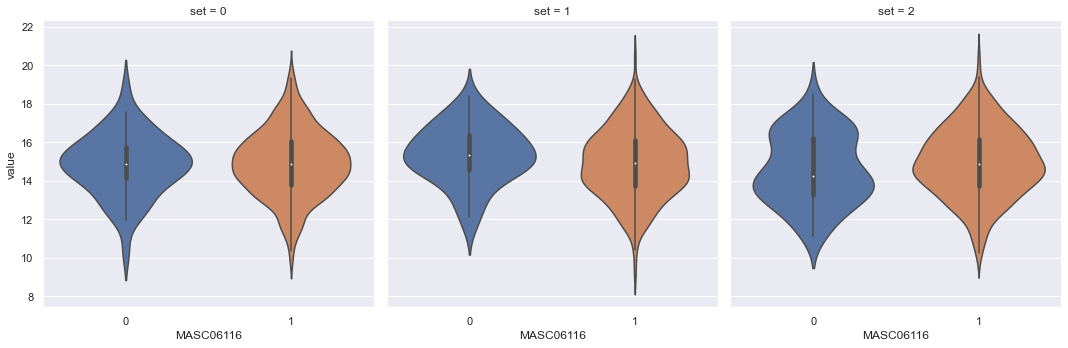

In [108]:
sns.catplot(data=fdf, x='MASC06116', y='value' , col='set', kind='violin')
# using our data frame we create three (col=set [one for each set]) violin plots (kind=violin) with one violin for MASC 1 and the other for MASC 0 (x=MASC06116) with the plot displaying fruitlength values (y=value).

Calculate the slope in your generated data set using StatsModels AND using the rise over run method (WITH CODE not by eyeballing it).

In [109]:
fulset = sm.add_constant(fdf)
# I add a constant to the entire data frame.
for b in range(3):
    # causes the code to run three times returning value b which will be used to call the set we are looking at

    midset = fulset[fdf['set'] == b]
    # calls the set we are looking for and creates a smaller df of only that set

    y = midset["value"]
    x = midset.loc[:,("MASC06116","const")]
    model_marker = sm.OLS(y, x).fit()
    # we create the model that calulates the relationship between masc and fruit_length with an intercept

    m1 = midset[midset['MASC06116'] == 1].loc[:,'value'].mean()
    # the mean value of plants with A MASC
    m2 = midset[midset['MASC06116'] == 0].loc[:,'value'].mean()
    # the mean value of plants with B MASC

    print(f'The StatModels slope for set {b} is {model_marker.params[0]}. The rise over run slope for set {b} is {m1 - m2}.')

The StatModels slope for set 0 is 0.0696020103169035. The rise over run slope for set 0 is 0.0696020103168955.
The StatModels slope for set 1 is -0.448623721631098. The rise over run slope for set 1 is -0.448623721631094.
The StatModels slope for set 2 is 0.3465029216544633. The rise over run slope for set 2 is 0.34650292165447283.


Explain how the visualization, the statsmodels slope, and the rise over run slope relate to each other.

In [110]:
## this aligns with the visual we saw in the violin plots as both plots looked really similar, with the same mean.